# Cats-vs-Dogs
#### Leead Jacobowitz 313308785


Contex:
- In this project I will be creating a classifying model from what we learned this semester inorder to classify the Cats-vs-Dogs dataset.
- The Cats-vs-Dogs dataset consists a training set of 25,000 example images and a test set of 12,500 example images.
- The imges are color-based, but for this project I will convert the images to gray-scale.
- Each image example has a different quadrangular shape, and has no consistint pixel ratio. 
- In this project I will not be using the testing dataset, and will be splitting the training dataset.

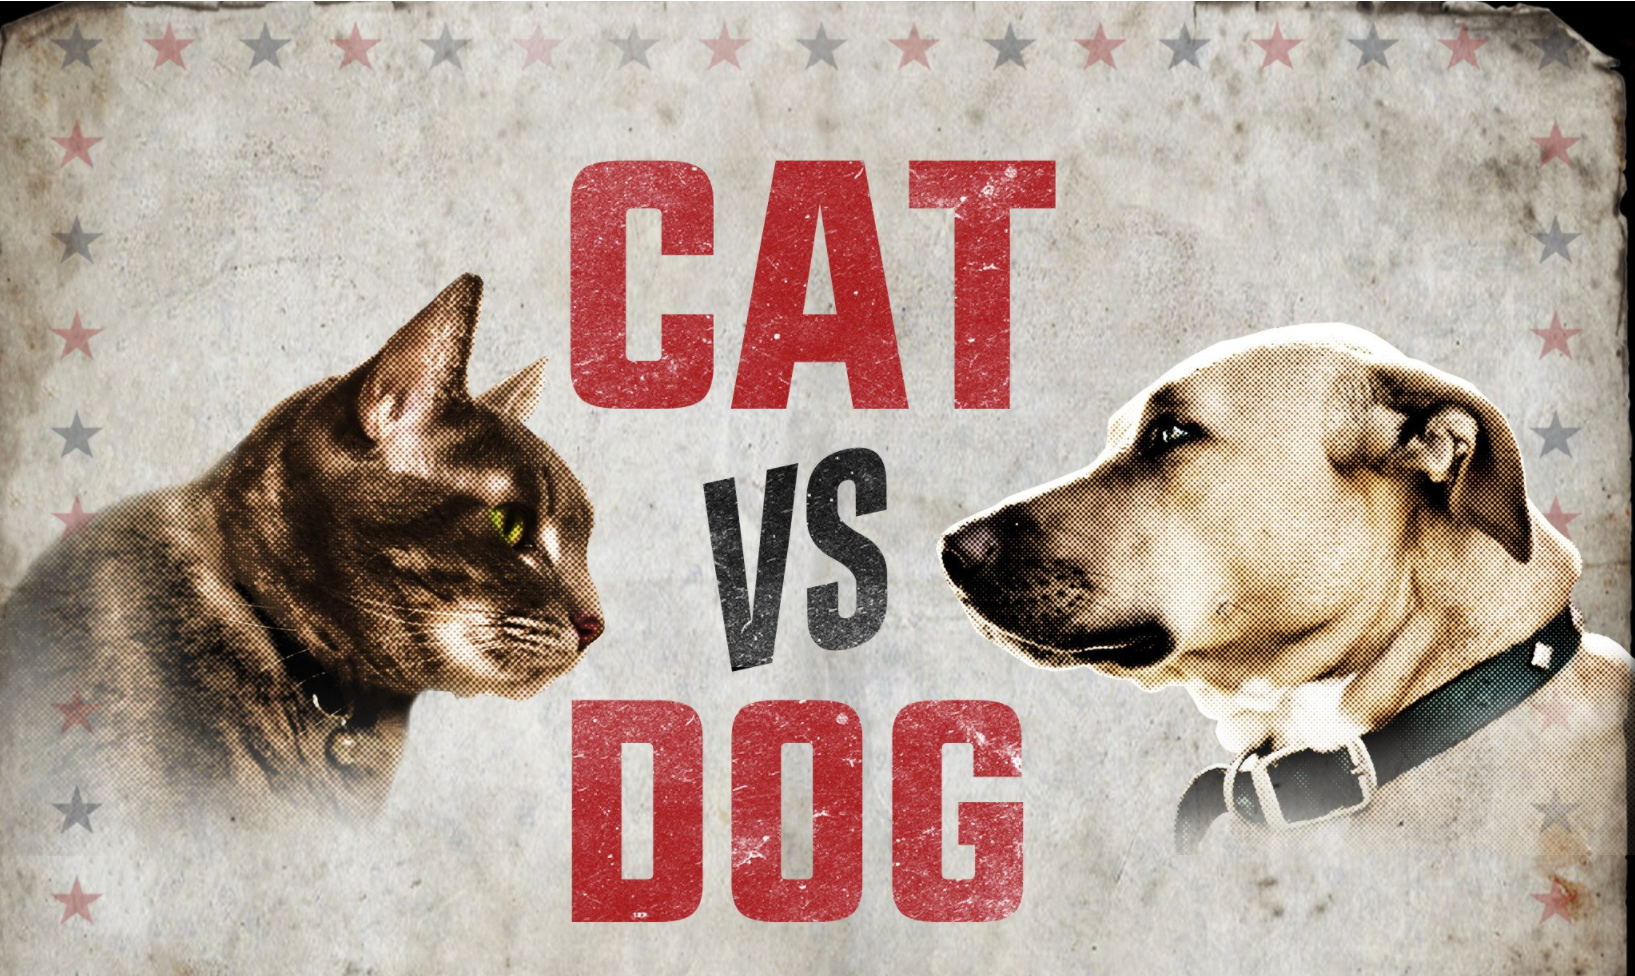

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2

## Importing two images for example:

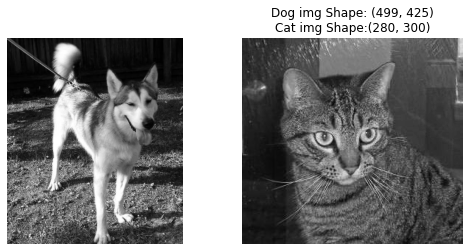

In [2]:
# Plotting the Images side-by-side:
cat = r"C:\Users\Leead\Desktop\Cats-vs-Dogs\train\cat.1.jpg"
dog = r"C:\Users\Leead\Desktop\Cats-vs-Dogs\train\dog.12483.jpg"

plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

cat_img = plt.imread(cat)
dog_img = plt.imread(dog)

fig, ax = plt.subplots(nrows=1, ncols=2)
plt.title('Dog img Shape: '+str(dog_img.shape)+"\nCat img Shape:"+str(cat_img.shape))
ax[1].axis('off')
ax[1].imshow(cat_img, cmap='gray')
ax[0].axis('off')
ax[0].imshow(dog_img, cmap='gray')
plt.show()

## Resizing the pixel dimension of the images
- I will resize the pixel dimension in order to determine the boundraries of classifying the image through a human eye.
- The pixel boundary which I will choose will be the starting point for the model.
- I will start by resizing the images to 10x10 and see what I get:

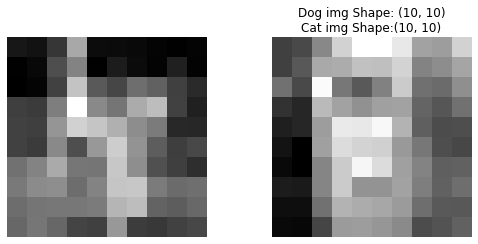

In [3]:
cat_resized = cv2.resize(cat_img, (10,10),interpolation = cv2.INTER_AREA)
dog_resized = cv2.resize(dog_img, (10,10),interpolation = cv2.INTER_AREA)
fig, ax = plt.subplots(nrows=1, ncols=2)
plt.title('Dog img Shape: '+str(dog_resized.shape)+"\nCat img Shape:"+str(cat_resized.shape))
ax[1].axis('off')
ax[1].imshow(cat_resized, cmap='gray')
ax[0].axis('off')
ax[0].imshow(dog_resized, cmap='gray')
plt.show()

- As we can see the images are very blury and can not be distinguished by a human eye.
- I will set a loop function which adds more pixels and then I will choose the best pixel boundary.
- Lets do 10-30 pixels:

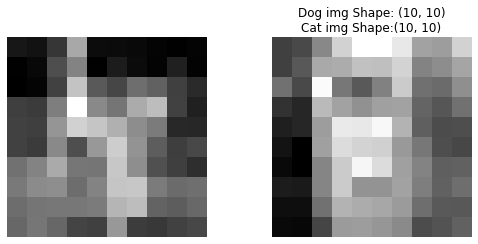

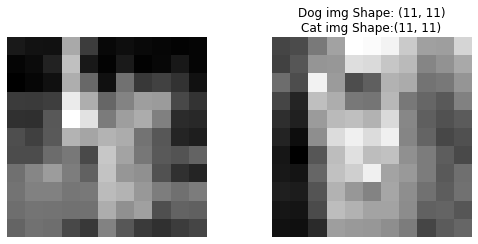

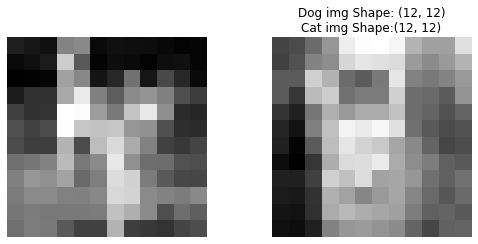

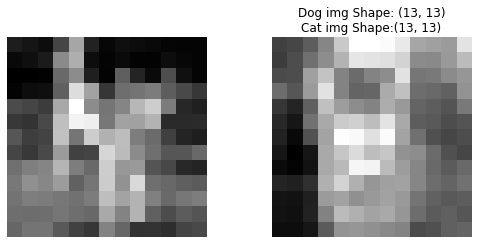

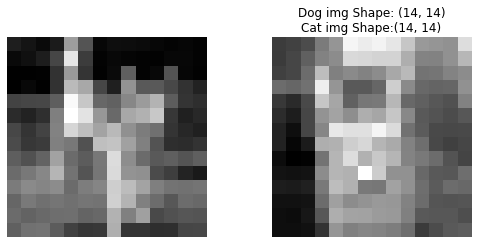

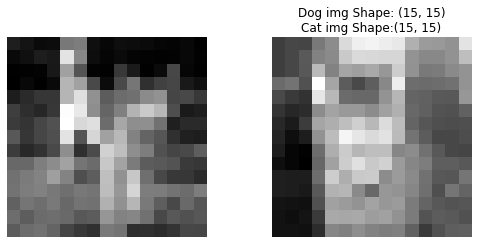

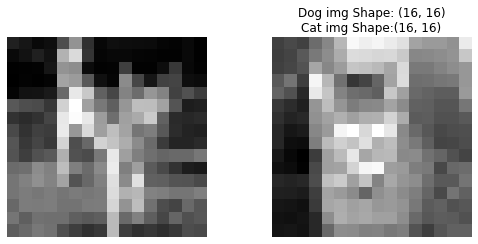

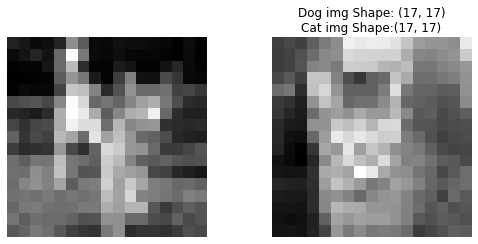

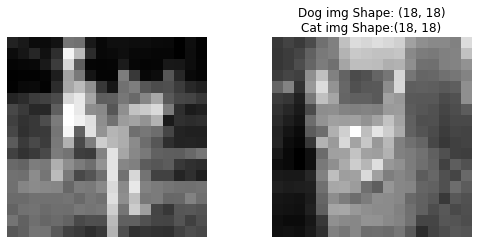

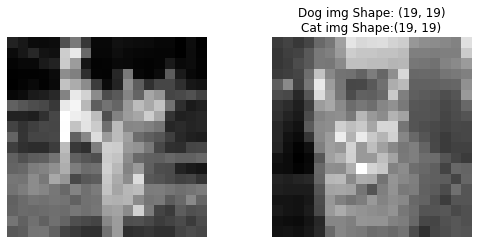

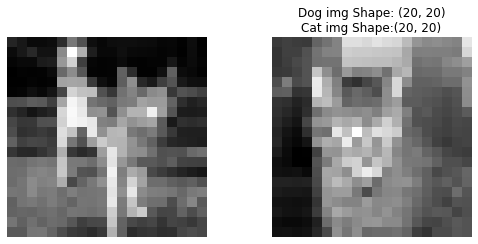

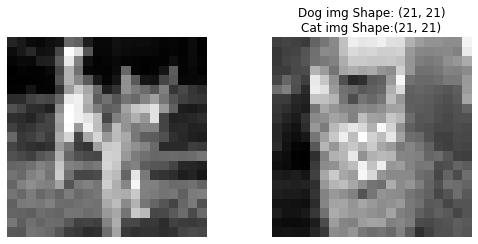

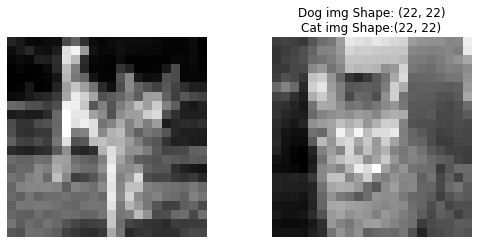

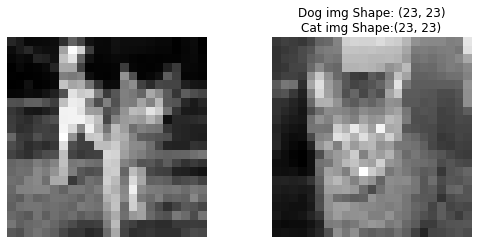

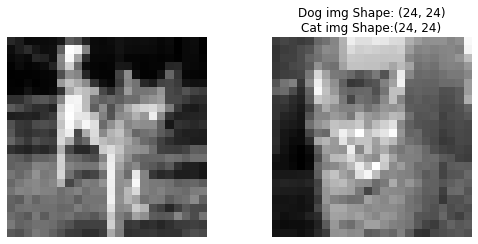

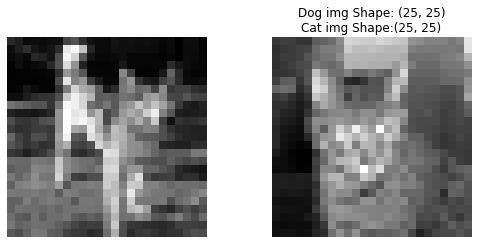

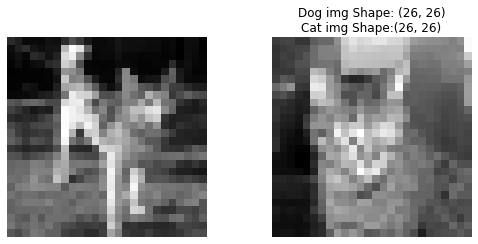

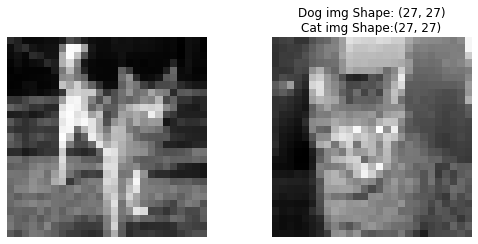

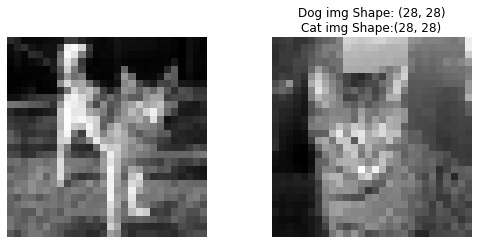

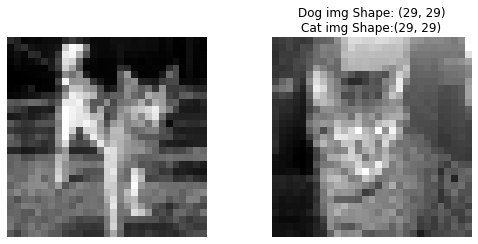

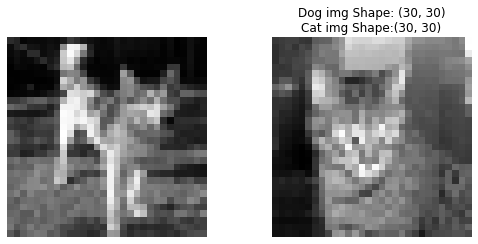

In [131]:
for i in range(10,31):
    cat_resized = cv2.resize(cat_img, (i,i),interpolation = cv2.INTER_AREA)
    dog_resized = cv2.resize(dog_img, (i,i),interpolation = cv2.INTER_AREA)
    fig, ax = plt.subplots(nrows=1, ncols=2)
    plt.title('Dog img Shape: '+str(dog_resized.shape)+"\nCat img Shape:"+str(cat_resized.shape))
    ax[1].axis('off')
    ax[1].imshow(cat_resized, cmap='gray')
    ax[0].axis('off')
    ax[0].imshow(dog_resized, cmap='gray')
    plt.show()

- Let's use 15x15 pixal scale and see how well we do.

In [104]:
p_size = 15

## Converting the images to a dataframe
- I will creat the first row of the datarame, both for the dog and cat images.

In [105]:
# Cats
row_1_cat = r"C:\Users\Leead\Desktop\Cats-vs-Dogs\train\cat.0.jpg"
img_gray_cat = cv2.imread(row_1_cat,0)
img_resized_cat = cv2.resize(img_gray_cat, (p_size, p_size),interpolation = cv2.INTER_AREA)
df_resized_cat = img_resized_cat.reshape(p_size*p_size)
df_c = pd.DataFrame(df_resized_cat)
df_train_cat = df_c.transpose()
df_train_cat

0    1    2    3    4    5    6    7    8    9    ...  215  216  217  218  \
0  179  198  209  196  136  129  221  230  229  223  ...   44   48   56   60   

   219  220  221  222  223  224  
0   52   24   45   40    7    4  

[1 rows x 225 columns]

In [106]:
# Dogs
row_1_dog = r"C:\Users\Leead\Desktop\Cats-vs-Dogs\train\dog.0.jpg"
img_gray_dog = cv2.imread(row_1_dog,0)
img_resized_dog = cv2.resize(img_gray_dog, (p_size, p_size),interpolation = cv2.INTER_AREA)
df_resized_dog = img_resized_dog.reshape(p_size*p_size)
df_d = pd.DataFrame(df_resized_dog)
df_train_dog = df_d.transpose()
df_train_dog

0    1    2    3    4    5    6    7    8    9    ...  215  216  217  218  \
0  147  137  143  152  146  155  140  154  159  148  ...  135  100  118  132   

   219  220  221  222  223  224  
0  117  114  108  111  134   75  

[1 rows x 225 columns]

##### Combining all of the cat and dog datasets:

In [107]:
# Importing the training datasets
dataset_cat = r"C:\Users\Leead\Desktop\Cats-vs-Dogs\train\cat."
dataset_dog = r"C:\Users\Leead\Desktop\Cats-vs-Dogs\train\dog."

In [108]:
for i in range(1,12500):
    path = r'{}{}.jpg'.format(dataset_cat,i)
    img_gray = cv2.imread(path,0)
    resized_img_cat = cv2.resize(img_gray, (p_size,p_size),interpolation = cv2.INTER_AREA)
    df_resized_cat = resized_img_cat.reshape(p_size*p_size)
    df = pd.DataFrame(df_resized_cat)
    df = df.transpose()
    df_train_cat = pd.concat([df_train_cat,df], axis=0)

##### Cat Dataframe

In [109]:
df_train_cat

0    1    2    3    4    5    6    7    8    9    ...  215  216  217  218  \
0   179  198  209  196  136  129  221  230  229  223  ...   44   48   56   60   
0    43   47   46   71   80  117  127  129  126  124  ...   74   81   75   73   
0   159  139  118   87   95  132  134   63   77   98  ...   30  108  134  117   
0   177  168  144  133  154  158  132  151  166  155  ...  121  114  114  109   
0   164  182  188  193  196  199  200  202  203  214  ...   17   20   22   26   
..  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
0   125  128  128  126  119  110  114  128  120  116  ...  120   93   89  199   
0   222  222  222  223  224  225  224  224  226  227  ...   46   38   40   39   
0   176  182  177  162  151  145  143  141  165  132  ...  126  138   53   42   
0   125   86   94   58   52   52   62   86  117  124  ...  208  230  233  166   
0    39   39   31   29   29   90  156  139  156  155  ...  216  196  157  149   

    219  220  221  222  223  224  
0    52   24   45   40    7    4  
0    74   60   41   52   58   59  
0   120   61   82   77   52   55  
0   107  109  110  133  168  178  
0    33   22   16   15   23   28  
..  ...  ...  ...  ...  ...  ...  
0   202  193  189  188  157  155  
0    38   35   43   74   80   80  
0    55   95  130  142  168  194  
0   152  223  231  226  219  204  
0   137  122  127  125  122  123  

[12500 rows x 225 columns]

In [110]:
for i in range(1,12500):
    path = r'{}{}.jpg'.format(dataset_dog,i)
    img_gray = cv2.imread(path,0)
    resized_img_dog = cv2.resize(img_gray, (p_size,p_size),interpolation = cv2.INTER_AREA)
    df_resized_dog = resized_img_dog.reshape(p_size*p_size)
    df = pd.DataFrame(df_resized_dog)
    df = df.transpose()
    df_train_dog = pd.concat([df_train_dog,df], axis=0)

##### Dog Dataframe:

In [111]:
df_train_dog

0    1    2    3    4    5    6    7    8    9    ...  215  216  217  218  \
0   147  137  143  152  146  155  140  154  159  148  ...  135  100  118  132   
0   114  111  106  109   81   62   71   75   86   81  ...  246  245  244  219   
0   158  164  146  122  118  114  159  174  162  166  ...  183  183  186  192   
0   208  212  208   99  157  204  204  162  196  187  ...  174  133   74  114   
0   184  185  155  156   90   96  105  106  106   99  ...  145  165  160  186   
..  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
0    57   34   41   63  134  150  158  155  170  150  ...  138  120   70   57   
0    63   76  185  194  155  254  254  253  252  251  ...  158   26   72   83   
0   119   80   96   99  110  100  160  227  213  196  ...  121  153  129  149   
0   219  226  231  233  234  233  229  187   59   37  ...  211  208  203  195   
0   149  201  184  162  178  203  216  212  203  203  ...  104  105   98  103   

    219  220  221  222  223  224  
0   117  114  108  111  134   75  
0   241  243  237  240  241  233  
0   194  195  196  194  185  178  
0   169  174  172  172  171  170  
0   173  190  205  189  120   57  
..  ...  ...  ...  ...  ...  ...  
0    32  108   63  134  133  122  
0    65   65  103   68   55   69  
0    94  131  163  122  159  168  
0   186  175  162   99   73   79  
0   105  140   68   60   97  126  

[12500 rows x 225 columns]

- Inserting a label for cat and dog:
 - cat = 0   
 - dog = 1

In [112]:
df_train_cat.insert(0, 'Animal', 0)
df_train_dog.insert(0, 'Animal', 1)

In [113]:
df_train_cat.head()

Animal    0    1    2    3    4    5    6    7    8  ...  215  216  217  \
0       0  179  198  209  196  136  129  221  230  229  ...   44   48   56   
0       0   43   47   46   71   80  117  127  129  126  ...   74   81   75   
0       0  159  139  118   87   95  132  134   63   77  ...   30  108  134   
0       0  177  168  144  133  154  158  132  151  166  ...  121  114  114   
0       0  164  182  188  193  196  199  200  202  203  ...   17   20   22   

   218  219  220  221  222  223  224  
0   60   52   24   45   40    7    4  
0   73   74   60   41   52   58   59  
0  117  120   61   82   77   52   55  
0  109  107  109  110  133  168  178  
0   26   33   22   16   15   23   28  

[5 rows x 226 columns]

In [114]:
df_train_dog.head()

Animal    0    1    2    3    4    5    6    7    8  ...  215  216  217  \
0       1  147  137  143  152  146  155  140  154  159  ...  135  100  118   
0       1  114  111  106  109   81   62   71   75   86  ...  246  245  244   
0       1  158  164  146  122  118  114  159  174  162  ...  183  183  186   
0       1  208  212  208   99  157  204  204  162  196  ...  174  133   74   
0       1  184  185  155  156   90   96  105  106  106  ...  145  165  160   

   218  219  220  221  222  223  224  
0  132  117  114  108  111  134   75  
0  219  241  243  237  240  241  233  
0  192  194  195  196  194  185  178  
0  114  169  174  172  172  171  170  
0  186  173  190  205  189  120   57  

[5 rows x 226 columns]

##### Combining and shuffling both datasets so we can get a fair training set:

In [115]:
from sklearn.utils import shuffle
df_train = df = pd.concat([df_train_dog, df_train_cat], axis = 0)
df_train = shuffle(df_train)
df_train

Animal    0    1    2    3    4    5    6    7    8  ...  215  216  217  \
0        1  196  222  251  249  251  231  229  229  228  ...   87   75   75   
0        0  192  213  223  205  147  137  154  157  142  ...  168  168  162   
0        0   49   49   60  119  123  117  121  117  115  ...  208  195  174   
0        1  248  248  248  246  217  158   80  156  232  ...  120  136  134   
0        1   37   64  139  115  147  163  178  183  184  ...  162  159  156   
..     ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
0        0   41   47   37   90   78   36   52   56   36  ...  165  167  168   
0        1    7   21   19   22   16   17   17   18   18  ...  183  182  176   
0        1   90   87   80   75   82   76   79   95  106  ...  137  119  130   
0        1   44   47  183  200  101   72   67  205  206  ...   91   89   93   
0        1  151  154  130   96  136  169  153  176  163  ...  180  148  137   

    218  219  220  221  222  223  224  
0    71   68   83   73   71   68   67  
0   163  163  163  161  160  159  159  
0   122  105  155  208  205  162   84  
0   136  134  128  131  124  109   78  
0   153  147  125  140  143  141  141  
..  ...  ...  ...  ...  ...  ...  ...  
0   166  172  175  188  169  167  163  
0   170  143  153  161  151  149  143  
0   172  182  195  190  184  181  189  
0    97   95   92   86   79   69   57  
0   146  142  116  117  105  110  187  

[25000 rows x 226 columns]

- Now that the data is shuffled I will remove the cat/dog label to clean the data:

In [116]:
X = df_train.iloc[:,1:]
Y = df_train.iloc[:,0]

In [117]:
X.head()

0    1    2    3    4    5    6    7    8    9    ...  215  216  217  218  \
0  196  222  251  249  251  231  229  229  228  223  ...   87   75   75   71   
0  192  213  223  205  147  137  154  157  142  121  ...  168  168  162  163   
0   49   49   60  119  123  117  121  117  115  144  ...  208  195  174  122   
0  248  248  248  246  217  158   80  156  232  172  ...  120  136  134  136   
0   37   64  139  115  147  163  178  183  184  190  ...  162  159  156  153   

   219  220  221  222  223  224  
0   68   83   73   71   68   67  
0  163  163  161  160  159  159  
0  105  155  208  205  162   84  
0  134  128  131  124  109   78  
0  147  125  140  143  141  141  

[5 rows x 225 columns]

In [118]:
Y.head()

0    1
0    0
0    0
0    1
0    1
Name: Animal, dtype: int64

#### Spliting the training data to new train-test
- I will be splitting the data to the common 20% test set and 80% training set.

In [119]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, train_size = 0.8, random_state=0, shuffle=True)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(20000, 225)
(20000,)
(5000, 225)
(5000,)


### Training set

#### Normalizing the training and testing data:
- We first need to normalize the data in order for all variables to have the same standard deviation, therefor all variables will have the same weight. 
- The data will be normalized between [0,1], therefor we need to dividing by the pixel range of grayscale (255):

In [120]:
norm_data_train = X_train.divide(other = 255)
norm_data_test = X_test.divide(other=255)

In [121]:
norm_data_train

0         1         2         3         4         5         6    \
0   0.301961  0.317647  0.325490  0.313725  0.321569  0.317647  0.298039   
0   0.266667  0.282353  0.298039  0.301961  0.301961  0.309804  0.313725   
0   0.650980  0.658824  0.662745  0.666667  0.666667  0.678431  0.674510   
0   0.368627  0.407843  0.356863  0.294118  0.278431  0.274510  0.286275   
0   0.952941  0.968627  0.933333  0.917647  0.886275  0.850980  0.800000   
..       ...       ...       ...       ...       ...       ...       ...   
0   0.858824  0.815686  0.788235  0.772549  0.760784  0.760784  0.745098   
0   0.262745  0.200000  0.239216  0.282353  0.298039  0.286275  0.243137   
0   0.376471  0.329412  0.215686  0.235294  0.180392  0.298039  0.258824   
0   0.325490  0.380392  0.443137  0.701961  0.635294  0.549020  0.537255   
0   0.262745  0.258824  0.247059  0.239216  0.243137  0.250980  0.247059   

         7         8         9    ...       215       216       217       218  \
0   0.290196  0.294118  0.309804  ...  0.658824  0.662745  0.670588  0.658824   
0   0.309804  0.298039  0.274510  ...  0.603922  0.305882  0.082353  0.070588   
0   0.682353  0.674510  0.678431  ...  0.254902  0.215686  0.141176  0.211765   
0   0.313725  0.298039  0.262745  ...  0.145098  0.231373  0.337255  0.274510   
0   0.756863  0.729412  0.756863  ...  0.458824  0.462745  0.372549  0.243137   
..       ...       ...       ...  ...       ...       ...       ...       ...   
0   0.721569  0.725490  0.752941  ...  0.835294  0.823529  0.819608  0.843137   
0   0.537255  0.431373  0.517647  ...  0.435294  0.415686  0.411765  0.439216   
0   0.184314  0.262745  0.180392  ...  0.521569  0.407843  0.274510  0.266667   
0   0.603922  0.666667  0.701961  ...  0.533333  0.549020  0.662745  0.631373   
0   0.188235  0.184314  0.172549  ...  0.721569  0.705882  0.701961  0.701961   

         219       220       221       222       223       224  
0   0.674510  0.650980  0.647059  0.666667  0.658824  0.635294  
0   0.380392  0.435294  0.356863  0.325490  0.321569  0.250980  
0   0.298039  0.341176  0.439216  0.447059  0.439216  0.325490  
0   0.231373  0.286275  0.203922  0.129412  0.121569  0.090196  
0   0.188235  0.223529  0.188235  0.141176  0.117647  0.101961  
..       ...       ...       ...       ...       ...       ...  
0   0.843137  0.823529  0.815686  0.847059  0.839216  0.847059  
0   0.423529  0.482353  0.486275  0.439216  0.396078  0.349020  
0   0.286275  0.247059  0.247059  0.203922  0.341176  0.486275  
0   0.556863  0.513725  0.478431  0.403922  0.450980  0.482353  
0   0.694118  0.686275  0.690196  0.694118  0.694118  0.678431  

[20000 rows x 225 columns]

##### PCA (Principal Component Analysis)
- Since there are 300 dimensions(features), that is too many and can cause a lot of noise.
- I will be using PCA which is a dimensionality-reduction method in order to make the model more efficient.
- I will be lossing a bit of accuracy but it will be worth the simplicity.

In [122]:
from sklearn.decomposition import PCA
pca=PCA()
pca.fit(norm_data_train)
cumilative_sum = np.cumsum(pca.explained_variance_ratio_)

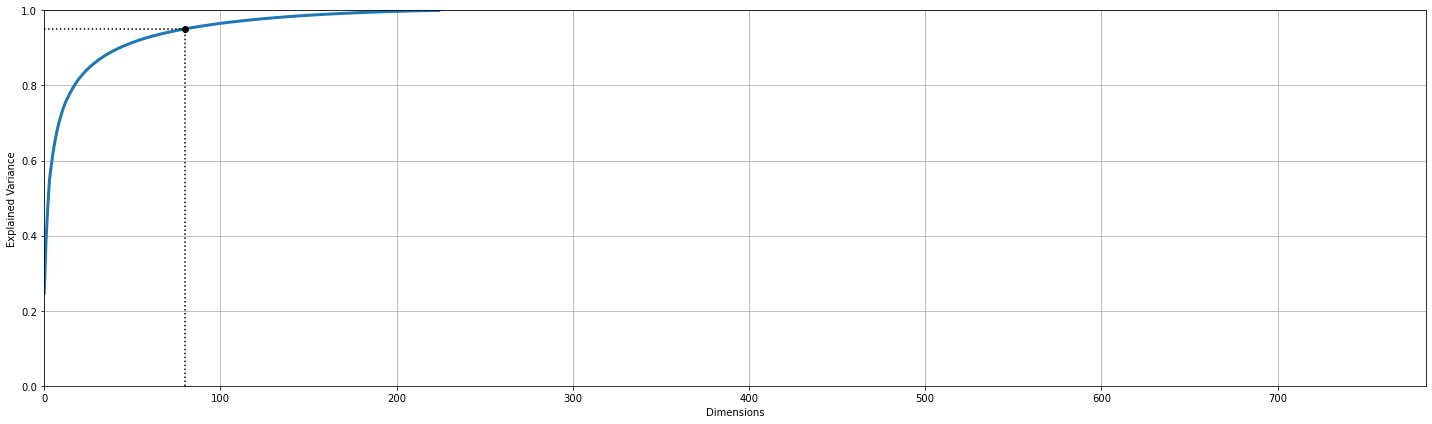

In [123]:
pca_plt = plt.figure(figsize=(20,6))
pca_plt = plt.plot(cumilative_sum, linewidth=3)
pca_plt = plt.axis([0, 784, 0, 1])
pca_plt = plt.xlabel("Dimensions")
pca_plt = plt.ylabel("Explained Variance")
x = np.argmax(cumilative_sum >= 0.95) + 1
pca_plt = plt.plot([x, x], [0, 0.95], "k:")
pca_plt = plt.plot([0, x], [0.95, 0.95], "k:")
pca_plt = plt.plot(x, 0.95, "ko")
plt.grid(True)
plt.show()

In [124]:
pca = PCA(n_components = 0.95)
pca.fit(norm_data_train)
reduced_train = pd.DataFrame(pca.transform(norm_data_train))
print("The total amount of dimensions: ",reduced_train.shape[1])

The total amount of dimensions:  80


- In order to keep 95% we can reduce the components to 80 dimensions. Which means the data only needs 80 PCs to explain 95% of the data.
- I think reducing the 80 PCs is worth loosing only 5% accuracy. 

##### Testing set reduction (n_components = 80)

In [128]:
pca_test = PCA(n_components = 80)
pca_test.fit(norm_data_test)
reduced_test = pd.DataFrame(pca.transform(norm_data_test))

#####  XGBoost

In [129]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(reduced_train, y_train)
xgb_pred = xgb.predict(reduced_test)
print('XGBoost accuracy score: %.2f'%(xgb.score(reduced_test, y_test)*100),'%')

C:\Users\Leead\New folder\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:35:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBoost accuracy score: 62.94 %


In [130]:
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score, classification_report
target_names = ['Cat','Dog']
report = classification_report(y_test, xgb_pred, target_names=target_names)
print(report)

              precision    recall  f1-score   support

         Cat       0.62      0.63      0.62      2443
         Dog       0.64      0.63      0.63      2557

    accuracy                           0.63      5000
   macro avg       0.63      0.63      0.63      5000
weighted avg       0.63      0.63      0.63      5000



## Conclusion
- In this project my goal was to build a classifying model for the Cats-vs-Dogs dataset.
- Using PCA I was able to decrease the amount of dimensions to 80 which allows the model to be a lot more simple and efficient.
- I decided to use a new model learned this semester, XGBoost.



- The total accuracy score is 63%